In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [111]:
PATH = 'liver/human_liver/property_T1.2'
PATH = pathlib.Path(PATH)

datasets = list(PATH.glob('*.csv'))
df = pd.concat([pd.read_csv(f, delimiter=';') for f in datasets], ignore_index=True)

In [112]:
units = df['Standard Units'].value_counts().to_dict()
# if unit corresponds to less than 1% of total, group it into 'Other'
total = sum(units.values())
units = {k: v for k, v in units.items() if v / total >=
    0.01}
units['Other'] = total - sum(units.values())
units = dict(sorted(units.items(), key=lambda item: item[1], reverse=True))

/tmp/ipykernel_80713/222459164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=units, palette="viridis")


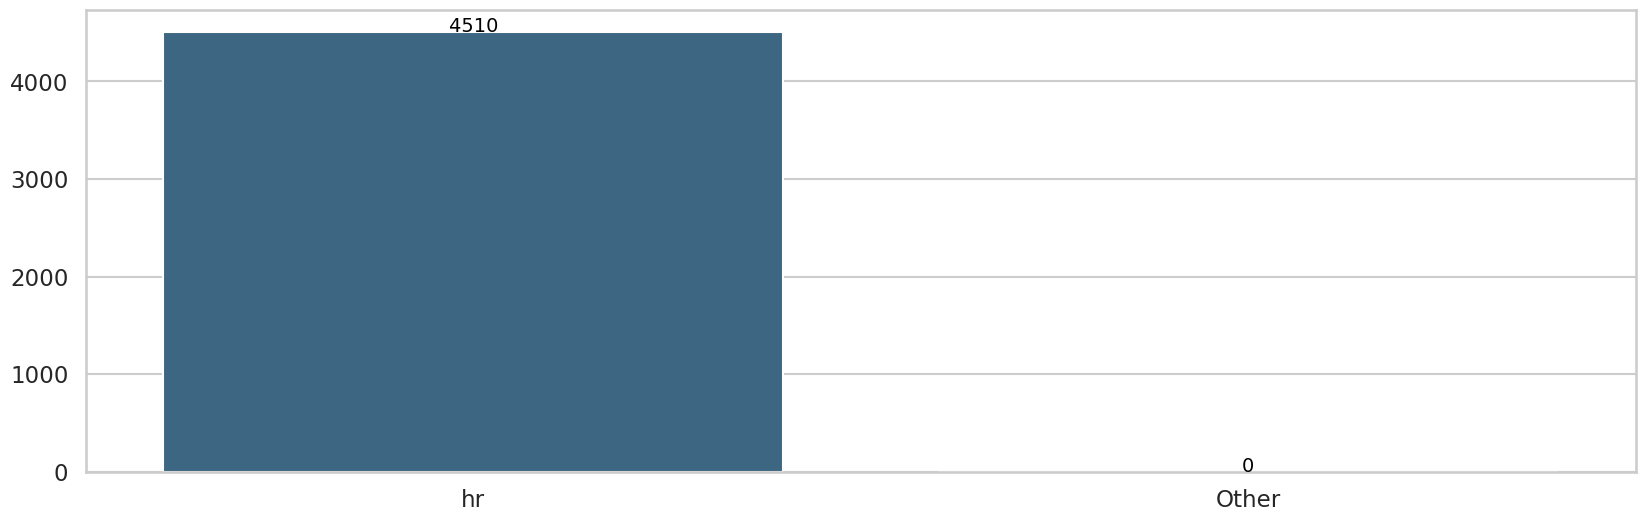

In [113]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_context("talk")
sns.barplot(data=units, palette="viridis")
# add counts on top of bars
for i, v in enumerate(units.values()):
    plt.text(i, v + 3, str(v), color='black', ha='center', fontsize=14)
plt.savefig(f'{PATH}/units.png', bbox_inches='tight')

In [118]:
rat_ic50 = pd.read_csv('/home/hubert/Desktop/toxicity/MAO-A/rat/property_ic50/DOWNLOAD-pGaeJFmXDZKURAR86juYmLsM0VahswpWeHZ2TMJo5qk_eq_.csv', delimiter=';').dropna(subset=['Standard Value'])
human_ic50 = pd.read_csv('/home/hubert/Desktop/toxicity/MAO-A/human/property_ic50/DOWNLOAD-RvWXCrLbO4KeLC_uFqv2OR0tVL8UD829dgq_uFmHhuc_eq_.csv', delimiter=';').dropna(subset=['Standard Value'])
rat_inhibition = pd.read_csv('/home/hubert/Desktop/toxicity/MAO-A/rat/property_inhibition/DOWNLOAD-6S9QiSLuqMFHTy7X4h2SU-JteboGkyHp_qdw4cOxC7s_eq_.csv', delimiter=';').dropna(subset=['Standard Value'])
human_inhibition = pd.read_csv('/home/hubert/Desktop/toxicity/MAO-A/human/property_inhibition/DOWNLOAD-Ko2sA0YGpHc-Bpf4P2S2aozLeVZZNvjRlW_9YuX8a5w_eq_.csv', delimiter=';').dropna(subset=['Standard Value'])

In [119]:
rat_dict = {'IC50': len(rat_ic50), 'Inhibition': len(rat_inhibition)}
human_dict = {'IC50': len(human_ic50), 'Inhibition': len(human_inhibition)}

/tmp/ipykernel_80713/3140773117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=human_dict, palette="viridis")


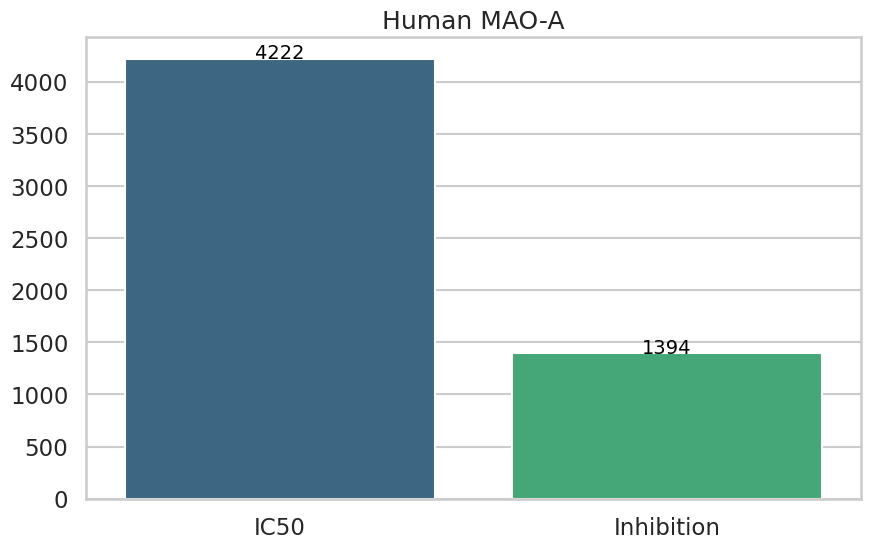

In [127]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set_context("talk")
sns.barplot(data=human_dict, palette="viridis")
# add counts on top of bars
for i, v in enumerate(human_dict.values()):
    plt.text(i, v + 3, str(v), color='black', ha='center', fontsize=14)
plt.title('Human MAO-A')
plt.savefig(f'human_mao_a.png', bbox_inches='tight')